In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

In [2]:
folders = glob.glob("../data/00_gaze_data/sub*")
folders.sort()
subjs = []
for f in folders:
    subjs.append(f[-6:])
print(len(subjs))    
subjs[:3]

condition_index = ['count trash']*20 + ['free viewing']*20
condition_index[:3]

40


['count trash', 'count trash', 'count trash']

In [3]:
list_of_dataframes = []

for i in range(len(subjs)): #use the first 20 subjs 1-20 -- condition1
    read_file_name = '../data/fixation_billboards_recall_recognition/'  + subjs[i] +'_fixations_billboards_recall_recognition.csv'
    df = pd.read_csv(read_file_name, index_col = 0)
    df['subject'] = subjs[i]
    df["condition"] = condition_index[i]
    list_of_dataframes.append(df)
    
large_df = pd.concat(list_of_dataframes)
large_df.tail()

,position_index,billboard_image_at_position_text,fix_bill,recall,recognition,subject,condition
15,16,furniture,2.0,0,1,sub040,free viewing
16,17,pizza,1.0,0,1,sub040,free viewing
17,18,smartphone,1.0,0,1,sub040,free viewing
18,19,texting_driving,2.0,0,0,sub040,free viewing
19,20,lawyer,2.0,0,1,sub040,free viewing


In [4]:
#plt.plot(large_df.recall.values)

In [21]:
large_df['fix_binarized'] = large_df['fix_bill']
#large_df.iloc[large_df['fix_binarized']>2] = 2

large_df.loc[large_df['fix_binarized'] > 1, 'fix_binarized'] = 1
#large_df.loc[large_df['fix_binarized'] > 3, 'fix_binarized'] = 3

large_df.head()
large_df.to_csv('../data/billboard_fixations_recall_recognition_df.csv')

/var/folders/p1/l_5nrnh10l3d2c5yg1n759_w0000gp/T/ipykernel_92925/2904141775.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pos_df = large_df[large_df['condition']=='count trash'].groupby('position_index').mean()
/var/folders/p1/l_5nrnh10l3d2c5yg1n759_w0000gp/T/ipykernel_92925/2904141775.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pos_df = large_df[large_df['condition']=='free viewing'].groupby('position_index').mean()


(0.0, 4.0)

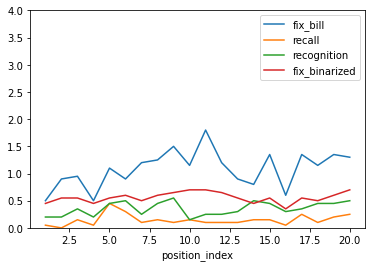

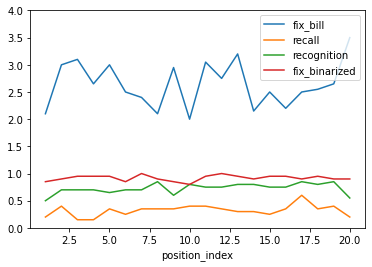

In [38]:
large_df.head()
by_pos_df = large_df[large_df['condition']=='count trash'].groupby('position_index').mean()
by_pos_df.plot()
plt.ylim([0,4])

by_pos_df = large_df[large_df['condition']=='free viewing'].groupby('position_index').mean()
by_pos_df.plot()
plt.ylim([0,4])




In [29]:
by_subject_df = large_df.groupby('subject').sum()
by_subject_df["condition"] = condition_index
by_subject_df = by_subject_df.drop(columns = "fix_binarized")
by_subject_df['recall_rate'] = by_subject_df['recall']/20 
by_subject_df['recognition_rate'] = by_subject_df['recognition']/20 
by_subject_df.to_csv('../data/billboard_fixations_recall_recognition_df_by_subjects.csv')
by_subject_df.head()

/var/folders/p1/l_5nrnh10l3d2c5yg1n759_w0000gp/T/ipykernel_92925/4116825822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_subject_df = large_df.groupby('subject').sum()


,position_index,fix_bill,recall,recognition,condition,recall_rate,recognition_rate
subject,,,,,,,
sub001,210,32.0,4,14,count trash,0.20,0.70
sub002,210,45.0,6,11,count trash,0.30,0.55
sub003,210,13.0,4,3,count trash,0.20,0.15
sub004,210,19.0,2,5,count trash,0.10,0.25
sub005,210,3.0,1,7,count trash,0.05,0.35


In [76]:
by_subject_df.head()

,position_index,fix_bill,recall,recognition,condition,recall_rate,recognition_rate
subject,,,,,,,
sub001,210,32.0,4,14,count trash,0.20,0.70
sub002,210,45.0,6,11,count trash,0.30,0.55
sub003,210,13.0,4,3,count trash,0.20,0.15
sub004,210,19.0,2,5,count trash,0.10,0.25
sub005,210,3.0,1,7,count trash,0.05,0.35


In [71]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'count trash'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'count trash'].recall.values)[0,1]

0.730930328342208

In [73]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'free viewing'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'free viewing'].recall.values)[0,1]

-0.2764210651158292

In [74]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'count trash'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'count trash'].recognition.values)[0,1]

0.7515534811231358

In [75]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'free viewing'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'free viewing'].recognition.values)[0,1]

-0.10861052172651191

In [69]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'count trash'].recall.values,
             by_subject_df[by_subject_df['condition'] == 'count trash'].recognition.values)[0,1]

0.5361892446295434

In [70]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'free viewing'].recall.values,
             by_subject_df[by_subject_df['condition'] == 'free viewing'].recognition.values)[0,1]

0.1961250992837777

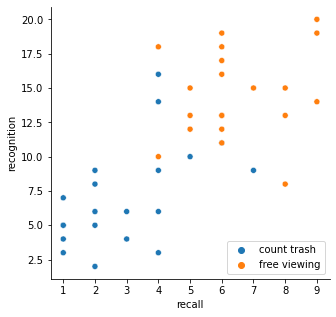

In [56]:
fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x   = by_subject_df.recall, 
                y   = by_subject_df.recognition,
                hue = by_subject_df.condition,
                #alpha=0.35,
                )

#plt.xticks([0, 100], ['not looked at', 'looked at'])
#plt.xlabel('BILLBOARD FIXATIONS');

#plt.ylim([0, 10],)
plt.legend(loc = 4)
#plt.ylabel('FREE RECALL');

sns.despine()

In [80]:
by_subject_by_fixbin_df = large_df.groupby(['subject', 'fix_binarized']).count()
by_subject_by_fixbin_df

position_index  billboard_image_at_position_text  \
subject fix_binarized                                                     
sub001  1.0                        20                                20   
sub002  0.0                         1                                 1   
        1.0                        19                                19   
sub003  0.0                        11                                11   
        1.0                         9                                 9   
...                               ...                               ...   
sub038  0.0                         1                                 1   
        1.0                        19                                19   
sub039  0.0                         2                                 2   
        1.0                        18                                18   
sub040  1.0                        20                                20   

                       fix_bill  recall  recognition  condition  
subject fix_binarized                                            
sub001  1.0                  20      20           20         20  
sub002  0.0                   1       1            1          1  
        1.0                  19      19           19         19  
sub003  0.0                  11      11           11         11  
        1.0                   9       9            9          9  
...                         ...     ...          ...        ...  
sub038  0.0                   1       1            1          1  
        1.0                  19      19           19         19  
sub039  0.0                   2       2            2          2  
        1.0                  18      18           18         18  
sub040  1.0                  20      20           20         20  

[67 rows x 6 columns]

### Plot

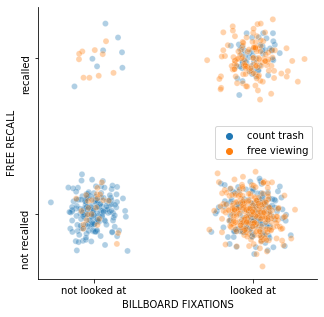

In [8]:
# list with ordered categories
fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x = jitter(large_df.fix_binarized,0), 
                y = jitter(large_df.recall,0),
                hue = large_df.condition,
                alpha=0.35,
                );
plt.legend(loc='right');

plt.xticks([0, 1], ['not looked at', 'looked at'])
plt.xlabel('BILLBOARD FIXATIONS');

plt.yticks([0, 1], ['not recalled', 'recalled'])
plt.yticks(rotation=90)
plt.ylabel('FREE RECALL');

sns.despine()

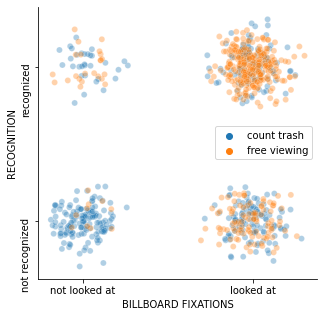

In [9]:
# list with ordered categories
fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x = jitter(large_df.fix_binarized,0), 
                y = jitter(large_df.recognition,0),
                hue = large_df.condition,
                alpha=0.35,
                );
plt.legend(loc='right');

plt.xticks([0, 1], ['not looked at', 'looked at'])
plt.xlabel('BILLBOARD FIXATIONS');

plt.yticks([0, 1], ['not recognized', 'recognized'])
plt.yticks(rotation=90)
plt.ylabel('RECOGNITION');

sns.despine()

In [83]:
large_df.head()

,position_index,billboard_image_at_position_text,fix_bill,recall,recognition,subject,condition,fix_binarized
0,1,texting_driving,2.0,0,1,sub001,count trash,1.0
1,2,burger,1.0,0,0,sub001,count trash,1.0
2,3,drunk_driving,1.0,0,0,sub001,count trash,1.0
3,4,coffee,1.0,0,0,sub001,count trash,1.0
4,5,hotel,1.0,0,0,sub001,count trash,1.0


In [ ]:
# list with ordered categories


fig, ax = plt.subplots(1, figsize=(5,5))

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

sns.scatterplot(x = jitter(large_df.fix_binarized,0), 
                y = jitter(large_df.recognition,0),
                alpha=0.5);




In [ ]:
by_img_res = large_df.groupby('billboard_image_at_position_text').mean()
by_img_res.head()

sns.lmplot(data = by_img_res,
           x    = "fix_binarized", 
           y    = "recall")

print(np.corrcoef(by_img_res.fix_binarized,
                  by_img_res.recall)[0,1])

by_pos_res = large_df.groupby('position_index').mean()

by_pos_res[['recall', 'fix_binarized']].plot(figsize = (10,4), ylim = (0,1));

by_pos_res.head()

In [ ]:
list_of_dataframes_2 = []

for i in range(20,40):
    print(i)
    read_file_name = '../data/fixation_billboards_recall/'  + subjs[i] +'_fixations_billboards_recall.csv'
    df = pd.read_csv(read_file_name, index_col = 0)
    df['sub'] = subjs[i]
    list_of_dataframes_2.append(df)
    
large_df2 = pd.concat(list_of_dataframes_2)
large_df2.head()




In [ ]:
large_df2.tail()

In [ ]:

large_df2['fix_binarized'] = large_df2['fix_bill']
#large_df.iloc[large_df['fix_binarized']>2] = 2

large_df2.loc[large_df2['fix_binarized'] > 1, 'fix_binarized'] = 1
#large_df.loc[large_df['fix_binarized'] > 3, 'fix_binarized'] = 3

large_df2

# list with ordered categories


fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x = jitter(large_df2.fix_binarized,0), 
                y = jitter(large_df2.recall,0),
                alpha=0.5,
                color = 'red');


In [ ]:
by_img_res2 = large_df2.groupby('billboard_image_at_position_text').mean()
by_img_res2.head()

sns.lmplot(data = by_img_res2,
           x    = "fix_bill", 
           y    = "recall")

print(np.corrcoef(by_img_res2.fix_binarized,
                  by_img_res2.recall)[0,1])

by_pos_res2 = large_df2.groupby('position_index').mean()

by_pos_res2[['recall', 'fix_bill']].plot(figsize = (10,4), ylim = (0,1));

by_pos_res2.head()

In [86]:
import numpy as np
from scipy.stats import chi2_contingency
obs = np.array([[0, 10], [5, 5]])
obs

array([[ 0, 10],
       [ 5,  5]])

In [95]:
res = chi2_contingency(obs)
res[1]

0.03886710381241731

In [112]:
subjs[0]


'sub001'

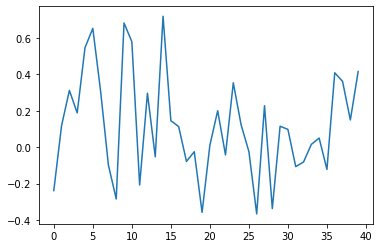

In [137]:
ress = []
i =0 
for i in range(len(subjs)):
    #print(i)
    df = large_df[large_df['subject'] ==subjs[i]]
    ress.append(np.corrcoef(df.fix_bill, df.recall, )[0,1])
    
ress
ra = np.asarray(ress)
ra
plt.plot(ra)

In [142]:
import scipy
scipy.stats.ttest_1samp(ra[:20],0)

Ttest_1sampResult(statistic=2.189217257743988, pvalue=0.04126775816706763)

In [143]:
large_df

,position_index,billboard_image_at_position_text,fix_bill,recall,recognition,subject,condition,fix_binarized
0,1,texting_driving,2.0,0,1,sub001,count trash,1.0
1,2,burger,1.0,0,0,sub001,count trash,1.0
2,3,drunk_driving,1.0,0,0,sub001,count trash,1.0
3,4,coffee,1.0,0,0,sub001,count trash,1.0
4,5,hotel,1.0,0,0,sub001,count trash,1.0
...,...,...,...,...,...,...,...,...
15,16,furniture,2.0,0,1,sub040,free viewing,1.0
16,17,pizza,1.0,0,1,sub040,free viewing,1.0
17,18,smartphone,1.0,0,1,sub040,free viewing,1.0
18,19,texting_driving,2.0,0,0,sub040,free viewing,1.0


In [144]:
by_f = large_df.groupby('fix_binarized').mean()
by_f

/var/folders/p1/l_5nrnh10l3d2c5yg1n759_w0000gp/T/ipykernel_92925/3086526638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_f = large_df.groupby('fix_binarized').mean()


,position_index,fix_bill,recall,recognition
fix_binarized,,,,
0.0,10.296651,0.000000,0.086124,0.258373
1.0,10.571912,2.524535,0.287648,0.641286


In [145]:
by_r = large_df.groupby('recall').mean()
by_r

/var/folders/p1/l_5nrnh10l3d2c5yg1n759_w0000gp/T/ipykernel_92925/4249381710.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_r = large_df.groupby('recall').mean()


,position_index,fix_bill,recognition,fix_binarized
recall,,,,
0,10.310458,1.699346,0.437908,0.687908
1,11.117021,2.404255,0.877660,0.904255


In [155]:
rrr = large_df.groupby(['subject', 'fix_binarized']).mean()

/var/folders/p1/l_5nrnh10l3d2c5yg1n759_w0000gp/T/ipykernel_92925/761436439.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rrr = large_df.groupby(['subject', 'fix_binarized']).mean()


In [156]:
rrr

position_index  fix_bill    recall  recognition
subject fix_binarized                                                 
sub001  1.0                 10.500000  1.600000  0.200000     0.700000
sub002  0.0                 13.000000  0.000000  1.000000     0.000000
        1.0                 10.368421  2.368421  0.263158     0.578947
sub003  0.0                  9.909091  0.000000  0.000000     0.000000
        1.0                 11.222222  1.444444  0.444444     0.333333
...                               ...       ...       ...          ...
sub038  0.0                 10.000000  0.000000  0.000000     0.000000
        1.0                 10.526316  3.789474  0.315789     0.684211
sub039  0.0                  9.000000  0.000000  0.500000     0.500000
        1.0                 10.666667  2.055556  0.277778     0.888889
sub040  1.0                 10.500000  2.250000  0.250000     0.750000

[67 rows x 4 columns]

In [157]:

rrr.to_csv('test.csv')

In [158]:
ls

00_Saliency.ipynb                  03_Fixation_Recall_Analysis.ipynb
01_ViewingBehavior.ipynb           test.csv
02_Recall_Recognition_Data.ipynb   utils/


In [185]:
subjres = []


for i in range(len(subjs)):
    #print(subjs[i])
    res = np.zeros(4)
    df = large_df[large_df['subject'] == subjs[i]]
    res[0] = df[ df['fix_binarized']==0]['recall'].sum()/20
    res[1] = df[ df['fix_binarized']==1]['recall'].sum()/20
    res[2] = df[ df['fix_binarized']==0]['recognition'].sum()/20
    res[3] = df[ df['fix_binarized']==1]['recognition'].sum()/20
    subjres.append(res)
    
subj_df = pd.DataFrame(np.asarray(subjres), columns = ['not_fixated_recalled', 'fixated_recalled','not_fixated_recognized', 'fixated_recognized'])
subj_df['subject'] = subjs
subj_df['condition'] = condition_index

subj_df.to_csv('fix_rec.csv')

In [ ]:
subjres = []


for i in range(len(subjs)):
    #print(subjs[i])
    res = np.zeros(4)
    df = large_df[large_df['subject'] == subjs[i]]
    res[0] = df[ df['fix_binarized']==0]['recall'].sum()
    res[1] = df[ df['fix_binarized']==1]['recall'].sum()
    res[2] = df[ df['fix_binarized']==0]['recall'].sum()
    res[3] = df[ df['fix_binarized']>3]['recall'].sum()
    subjres.append(res)
    
subj_df = pd.DataFrame(np.asarray(subjres), columns = ['not_fixated_recalled', 'fixated_recalled','not_fixated_recognized', 'fixated_recognized'])
subj_df['subject'] = subjs
subj_df['condition'] = condition_index

subj_df.to_csv('fix_rec.csv')

In [231]:
df[ df['fix_bill']!=0]['fix_bill'].median()

2.0

In [226]:
subjres = []


#dose - response - relationship....

#can be done very individual-specific, i.e. by a median split of the participants fixations or so 0 (some) (many)
for i in range(len(subjs)):
    #print(subjs[i])
    res = np.zeros(3)
    df = large_df[large_df['subject'] == subjs[i]]
    res[0] = df[ df['fix_bill']==0]['recall'].sum()
    
    #df = large_df[large_df['subject'] == subjs[i]]
    interim_df = df[ df['fix_bill'] == 1 ]
    #interim_df = interim_df[ interim_df['fix_bill'] < 4]
    res[1] = interim_df['recall'].sum() # between 1
     
    #df = large_df[large_df['subject'] == subjs[i]]    
    res[2] = df[ df['fix_bill']>1]['recall'].sum()  # more than 2 fixations
    subjres.append(res)
    
subj_df = pd.DataFrame(np.asarray(subjres), columns = ['not_fixated_recalled', 'fixated_1_recalled','fixated_morethan2_recalled'])
subj_df['subject'] = subjs
subj_df['condition'] = condition_index

subj_df.to_csv('fix_rec-0-123-morethan3_sum.csv')

subj_df

,not_fixated_recalled,fixated_1_recalled,fixated_morethan2_recalled,subject,condition
0,0.0,3.0,1.0,sub001,count trash
1,1.0,1.0,4.0,sub002,count trash
2,0.0,3.0,1.0,sub003,count trash
3,0.0,1.0,1.0,sub004,count trash
4,0.0,1.0,0.0,sub005,count trash
5,1.0,1.0,1.0,sub006,count trash
6,0.0,0.0,1.0,sub007,count trash
7,2.0,0.0,0.0,sub008,count trash
8,0.0,3.0,1.0,sub009,count trash
9,0.0,0.0,4.0,sub010,count trash


In [222]:
df[ df['fix_binarized']>3]['recall'].sum()

0

In [191]:
df.head()

,position_index,billboard_image_at_position_text,fix_bill,recall,recognition,subject,condition,fix_binarized
0,1,stop_smoking,3.0,0,0,sub040,free viewing,1.0
1,2,hotel,1.0,0,1,sub040,free viewing,1.0
2,3,burger,3.0,0,1,sub040,free viewing,1.0
3,4,brunch,1.0,0,1,sub040,free viewing,1.0
4,5,distracted_driving,4.0,0,0,sub040,free viewing,1.0


In [166]:
df.groupby(['fix_binarized']).sum()

/var/folders/p1/l_5nrnh10l3d2c5yg1n759_w0000gp/T/ipykernel_92925/4084949989.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['fix_binarized']).sum()


,position_index,fix_bill,recall,recognition
fix_binarized,,,,
0.0,109,0.0,0,0
1.0,101,13.0,4,3
